In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc, select

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
# This will give you the tables available in the database
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis
* Design a query to retrieve the last 12 months of precipitation data and plot the results
* Calculate the date 1 year ago from the last data point in the database
* Perform a query to retrieve the data and precipitation scores
* Save the query results as a Pandas DataFrame and set the index to the date column
* Sort the dataframe by date
* Use Pandas Plotting with Matplotlib to plot the data

In [11]:
# Use `inspector` to display the column details for measurement table for reference
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### Station Analysis - Inspect the Station Table
* Contains Station, Name, Lat, Long, Elevation

In [12]:
# Use `inspector` to display the column details for station table for reference
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Use `engine.execute` to select and display the first 10 rows from the Station table
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

### Inspect the Measurement table
* Contains station, date, precipitation measurement, temperature measurement

In [14]:
# Use `inspector` to display the column details for measurement table for reference
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [15]:
# Use `engine.execute` to select and display the first 10 rows from the Measurement table
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [16]:
# Determine the most recent data point
for row in session.query(Measurement.date).order_by(Measurement.date.desc()).limit(5).all():
    print(row)

('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-23',)
('2017-08-22',)


#### The most recent measurement date is 2017-08-23
* A year would be 2017-08-23 - 2016-08-23

In [17]:
# Determine a query that will select the last 12 months of data
for row in session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.date.desc()).filter(Measurement.date>='2016-08-23').all():
    print(row)

(2724, '2017-08-23', 0.0, 81.0)
(7635, '2017-08-23', 0.0, 82.0)
(12187, '2017-08-23', 0.08, 82.0)
(19550, '2017-08-23', 0.45, 76.0)
(2723, '2017-08-22', 0.0, 82.0)
(12186, '2017-08-22', 0.0, 82.0)
(19549, '2017-08-22', 0.5, 76.0)
(2722, '2017-08-21', 0.0, 81.0)
(7634, '2017-08-21', 0.02, 79.0)
(12185, '2017-08-21', None, 82.0)
(19548, '2017-08-21', 0.56, 76.0)
(2721, '2017-08-20', 0.0, 81.0)
(7633, '2017-08-20', 0.01, 80.0)
(19547, '2017-08-20', None, 78.0)
(2720, '2017-08-19', 0.0, 79.0)
(7632, '2017-08-19', 0.0, 80.0)
(12184, '2017-08-19', None, 85.0)
(19546, '2017-08-19', 0.09, 71.0)
(2719, '2017-08-18', 0.0, 80.0)
(7631, '2017-08-18', 0.0, 77.0)
(14959, '2017-08-18', 0.06, 79.0)
(19545, '2017-08-18', None, 76.0)
(7630, '2017-08-17', 0.0, 78.0)
(12183, '2017-08-17', 0.05, 83.0)
(14958, '2017-08-17', 0.01, 76.0)
(19544, '2017-08-17', 0.13, 72.0)
(7629, '2017-08-16', 0.0, 82.0)
(12182, '2017-08-16', 0.07, 79.0)
(14957, '2017-08-16', 0.12, 76.0)
(19543, '2017-08-16', 0.42, 71.0)
(2718,

### Perform a query to retrieve the data
* Now that we have a working query, get all the data and place it in several arrays
* Will need to remove them from the tupples

In [18]:
# Initialize lists to store values from the Measurement Table
measurement_id = []
measurement_date = []
measurement_prcp = []
measurement_tobs = []

# Querry measurement table for the last 12 months (365 days)
results = session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.tobs).order_by(Measurement.date.desc()).filter(Measurement.date>='2016-08-23').all()

# List comprehensions to extract values from tuple
measurement_id = [result[0] for result in results]
measurement_date = [result[1] for result in results]
measurement_prcp = [result[2] for result in results]
measurement_tobs = [result[3] for result in results]

### Save the query results as a Pandas DataFrame and set the index to the date column
* Evaluate data structure and identify any NaN values.

In [19]:
measurement_dict = {'id' : measurement_id, 'date' : measurement_date, 'prcp' : measurement_prcp, 'tobs' : measurement_tobs}

measurement_df = pd.DataFrame(measurement_dict)
measurement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 4 columns):
id      2230 non-null int64
date    2230 non-null object
prcp    2021 non-null float64
tobs    2230 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 69.8+ KB


### Clean Data
* Convert date column into datetime object
* Create a second database where rows with NaN values are dropped
* Set date column to index

In [20]:
# Convert date column into datetime object
measurement_df["date"] = pd.to_datetime(measurement_df["date"], format = '%Y-%m-%d')

In [22]:
# Determine how many non float values are in respective columns (precipitation and temp)
print(measurement_df['prcp'].isnull().sum(), measurement_df['tobs'].isnull().sum())

209 0


In [23]:
# Set date column to index
date_idx_df = measurement_df.set_index('date')
date_idx_df.head()

,id,prcp,tobs
date,,,
2017-08-23,2724,0.00,81.0
2017-08-23,7635,0.00,82.0
2017-08-23,12187,0.08,82.0
2017-08-23,19550,0.45,76.0
2017-08-22,2723,0.00,82.0


In [24]:
# Sort the dataframe by date
date_idx_df.sort_values(by = ['date']).head()

,id,prcp,tobs
date,,,
2016-08-23,19202,0.70,74.0
2016-08-23,2364,0.00,81.0
2016-08-23,5091,0.15,76.0
2016-08-23,14608,1.79,77.0
2016-08-23,8825,NaN,80.0


###  Use Pandas Plotting with Matplotlib to plot the data


In [25]:
# Create a new dataframe that contains only the date and prcp data
date_prcp_df = measurement_df[['date','prcp']]
date_prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
date    2230 non-null datetime64[ns]
prcp    2021 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.9 KB


In [26]:
# Droip any rows with missing data
date_prcp_df = date_prcp_df.dropna(how='any', axis = 0)
date_prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021 entries, 0 to 2229
Data columns (total 2 columns):
date    2021 non-null datetime64[ns]
prcp    2021 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.4 KB


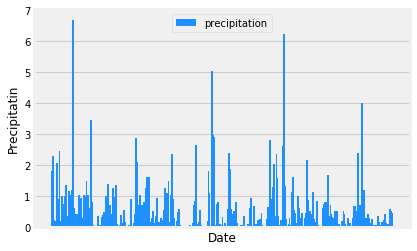

In [28]:
x = date_prcp_df['date'].values
y = date_prcp_df['prcp'].values

plt.bar(x, y, color = 'dodgerblue', width = 2, label = 'precipitation')
plt.ylabel('Precipitatin')
plt.xlabel('Date')
plt.xticks([])
plt.grid(True, which='major', axis='both')
plt.legend(loc='upper center')
plt.show()

![precipitation](Images/precipitation.png)

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data (using the un-indexed df)
# I did not delete the rows with NaN, so this value is higher than the expected output
prcp_summary = measurement_df[['prcp']].describe()
prcp_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

### Explore Stations Table
* How many stations
* Describe the data structure
* Which is the most active station

In [58]:
# Design a query to show how many stations are available in this dataset?
number_stations = session.query(Station).group_by(Station.station).count()
number_stations

9

In [60]:
# Design a query to show how many stations are available in this dataset and the datastructure
# Use `inspector` to display the column details for station table for reference
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#### Determine which station has the highest number of data (in particular temperature observations)

In [79]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# Measurement station, number of measurement dates, the most recent measurement date, the number of temperature observations, the minimal temperature observed at that station, the maximum temperature reported at that station, and the average.
for row in session.query(Measurement.station, func.count(Measurement.date).label("date counts"), func.max(Measurement.date).label("recent date"), func.count(Measurement.tobs).label("temp counts"), func.min(Measurement.tobs).label("min_temp"), func.max(Measurement.tobs).label("max_temp"), func.avg(Measurement.tobs).label("avg_temp")).group_by(Measurement.station).order_by(desc("temp counts")).all():
    print(row)

('USC00519281', 2772, '2017-08-18', 2772, 54.0, 85.0, 71.66378066378067)
('USC00519397', 2724, '2017-08-23', 2724, 56.0, 87.0, 74.55323054331865)
('USC00513117', 2709, '2017-07-31', 2709, 59.0, 85.0, 72.68918420081211)
('USC00519523', 2669, '2017-08-23', 2669, 56.0, 85.0, 74.5436493068565)
('USC00516128', 2612, '2017-08-23', 2612, 58.0, 84.0, 70.91500765696784)
('USC00514830', 2202, '2017-08-23', 2202, 58.0, 85.0, 74.8732970027248)
('USC00511918', 1979, '2015-10-30', 1979, 53.0, 87.0, 71.61596766043456)
('USC00517948', 1372, '2017-07-31', 1372, 58.0, 87.0, 74.68440233236151)
('USC00518838', 511, '2015-11-20', 511, 58.0, 83.0, 72.72407045009784)


In [80]:
# Using the station id from the previous query, calculate the lowest temperature recorded, and use ravel to print into 1D array
specific_station_stats = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(np.ravel(specific_station_stats))

['USC00519281' '54.0' '85.0' '71.66378066378067' '2772']


In [85]:
# Extract the station ID for use in filtering query
station_id = specific_station_stats[0][0]
station_id

'USC00519281'

In [86]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).filter(Measurement.station == station_id).filter(Measurement.date > '2016-08-18').all()
station_data

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

In [88]:
# Extract the temperature values from the station_data set using a list comprehension and then evaluate the number of observations
temp_vals = [result[2] for result in station_data]
len(temp_vals)

356

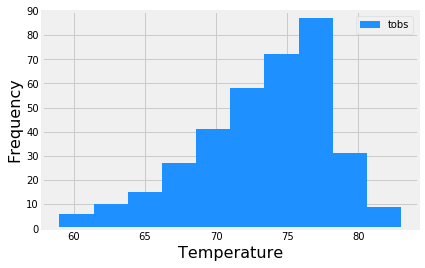

In [89]:
x = temp_vals
bins = 12

label = ["tobs"]
plt.hist(x, bins=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='dodgerblue', label="tobs", stacked=False, normed=None, data=None)
plt.xlabel("Temperature", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)
plt.ylim(0, 90)
plt.legend(label)
plt.show()

![precipitation](Images/station-histogram.png)

In [90]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [92]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
end_date = "2017-08-18"
start_date = "2016-08-18"
temp_stats = calc_temps(start_date, end_date)
temp_stats

[(58.0, 74.59875167186803, 87.0)]

In [93]:
# Save values into min, max, and avg variables for plotting purposes, and round values.
t_min = round(temp_stats[0][0],3)
t_avg = round(temp_stats[0][1],3)
t_max = round(temp_stats[0][2],3)
print(t_min, t_avg, t_max)

58.0 74.599 87.0


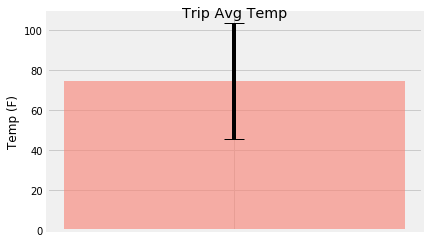

In [94]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x= ''
y = t_avg
error = t_max-t_min
plt.bar(x, y, yerr=error, color = "salmon", align='center', width = 2, alpha=0.6, ecolor='black', capsize=10)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp", y = 0.95)
plt.show()

In [95]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [96]:
# Use `inspector` to display the column details for station table for reference
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [114]:
## Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.avg(Measurement.prcp)]
same_stations = session.query(*sel).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(Measurement.prcp.desc()).filter(Measurement.date > '2016-08-18').all()

for record in same_stations:
    (M_s, S_n, S_lat, S_lon, S_e, M_p) = record
    print(record)


('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.4596084337349399)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.20469101123595507)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14391930835734879)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12475655430711609)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0458677685950413)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.12207547169811321)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0765)


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
